In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import pickle
import os

from collections import namedtuple
from coloc.spike_and_slab_ser import SpikeSlabSER

import matplotlib.pyplot as plt
import seaborn as sns

ModelParams = None

model_names = os.listdir('/work-zfs/abattle4/karl/ss_ser/models')

models = {}
for model in model_names:
    model_dict = pickle.load(open('/work-zfs/abattle4/karl/ss_ser/models/{}'.format(model), 'rb'))
    #if ModelParams is None:
    #    ModelParams = namedtuple('ModelParams', model_dict.keys())
    #models[model] = ModelParams(**model_dict)
    models[model] = model_dict
    
def split(model_name):
    gene, K, penalty, nonneg, run = model_name.split('_')[:-1]
    gene = gene[4:]
    K = int(K[1:])
    penalty = float(penalty[6:])
    nonneg = bool(nonneg[5:])
    run = int(run)
    return {'gene': gene, 'K': K, 'penalty': penalty, 'nonneg': nonneg, 'run': run}

def get_key(row):
    return 'gene-{}_sigma2-{}_phi-{}_K-{}_run-{}_model'.format(*list(row))

def get_zscores(gene):
    pass

In [7]:
keys = list(models.keys())
overview = pd.DataFrame([{x.split('-')[0]: x.split('-')[1] for x in key.split('_')[:-1]} for key in keys])

genes = np.unique(overview.gene)
sigma2s = np.unique(overview.sigma2)
phis = np.unique(overview.phi)
Ks = np.unique(overview.K)

In [8]:
genes

array(['ENSG00000073464.11', 'ENSG00000100258.17', 'ENSG00000135362.13',
       'ENSG00000141644.17', 'ENSG00000141934.9', 'ENSG00000160181.8',
       'ENSG00000164904.17', 'ENSG00000178172.6', 'ENSG00000184293.7',
       'ENSG00000185238.12', 'ENSG00000239887.4'], dtype=object)

In [4]:
print(genes)
print(sigma2s)
print(phis)
print(Ks)

['ENSG00000073464.11' 'ENSG00000100258.17' 'ENSG00000135362.13'
 'ENSG00000141644.17' 'ENSG00000141934.9' 'ENSG00000160181.8'
 'ENSG00000164904.17' 'ENSG00000178172.6' 'ENSG00000184293.7'
 'ENSG00000185238.12']
['10.00' '100.00' '20.00' '5.00']
['0.02' '0.05' '0.14' '0.37']
['20']


In [ ]:
model.

gene-ENSG00000073464.11_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000073464.11


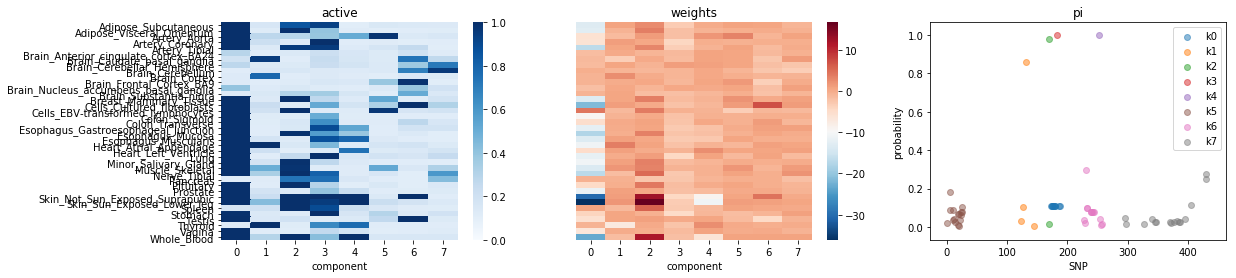

gene-ENSG00000100258.17_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000100258.17


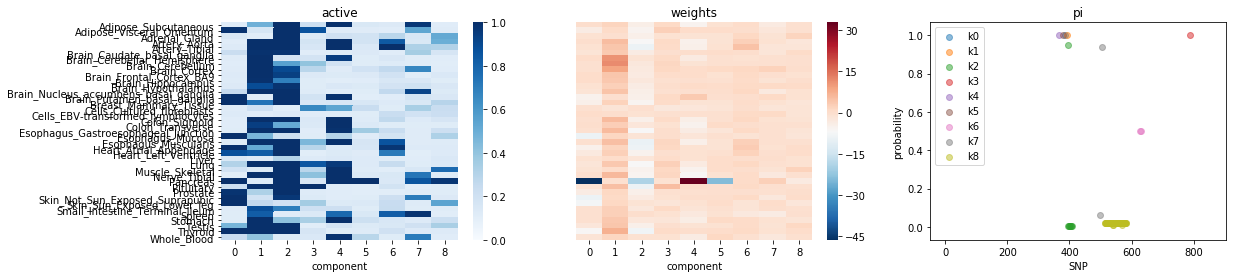

gene-ENSG00000135362.13_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000135362.13


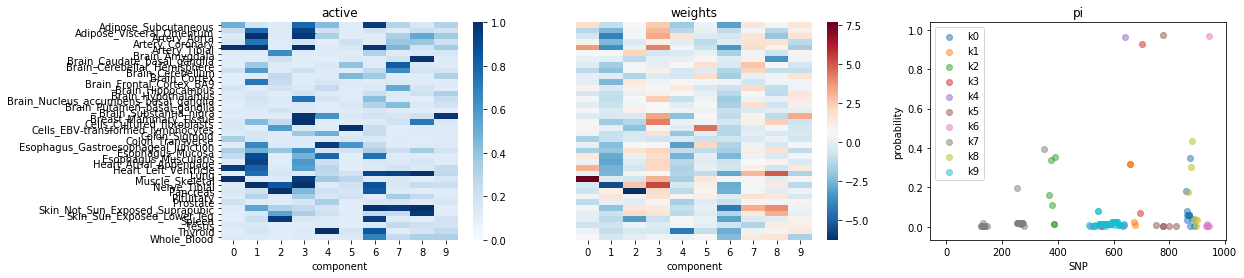

gene-ENSG00000141644.17_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000141644.17


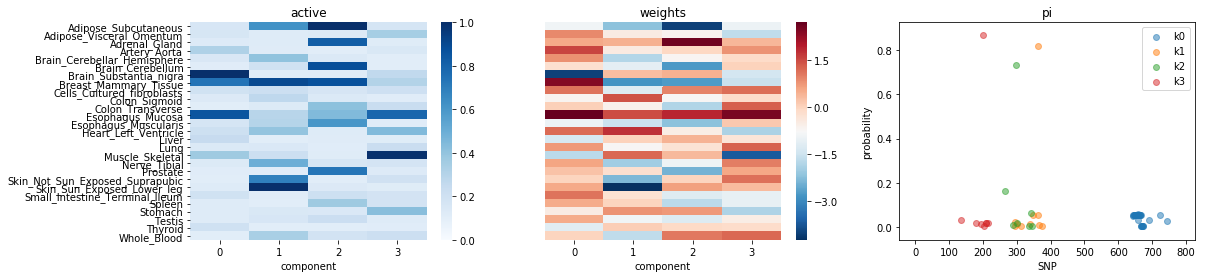

gene-ENSG00000141934.9_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000141934.9


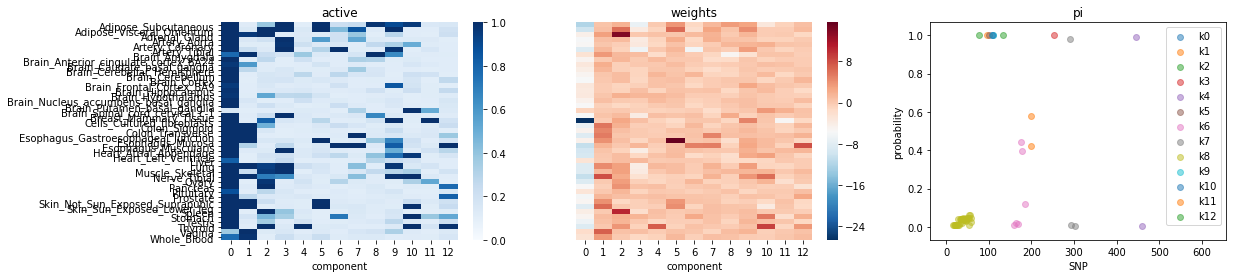

gene-ENSG00000160181.8_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000160181.8


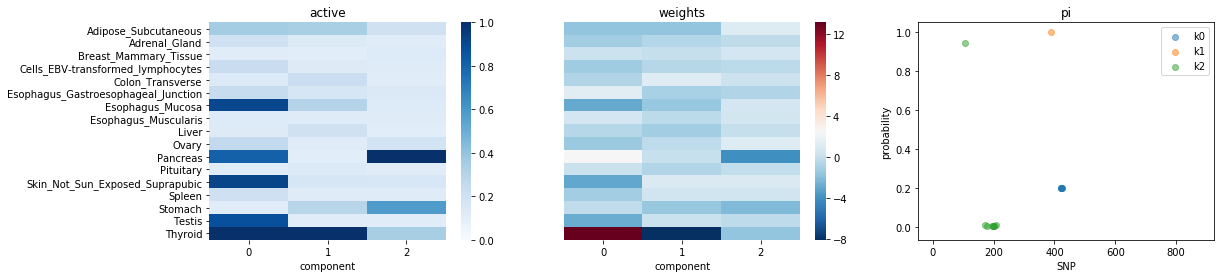

gene-ENSG00000164904.17_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000164904.17


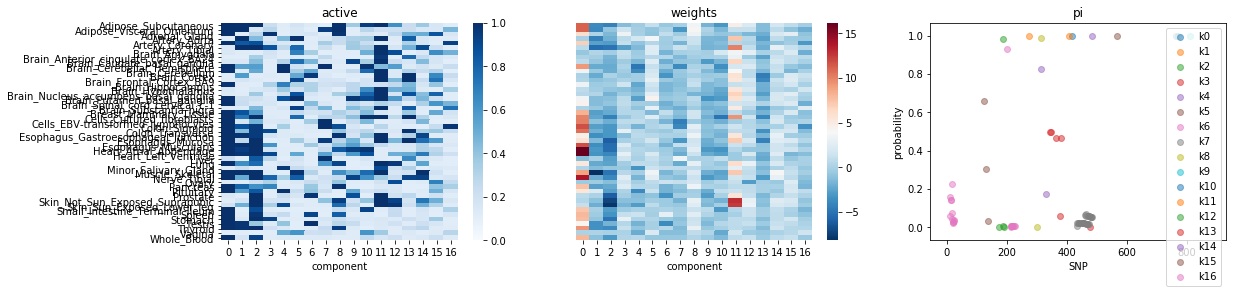

gene-ENSG00000178172.6_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000178172.6


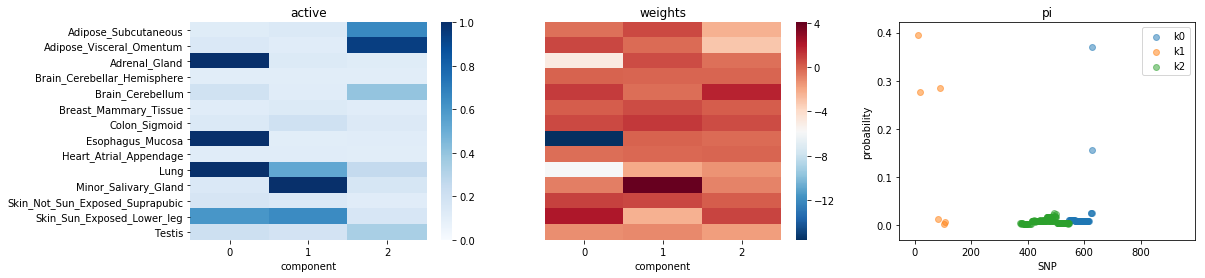

gene-ENSG00000184293.7_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000184293.7


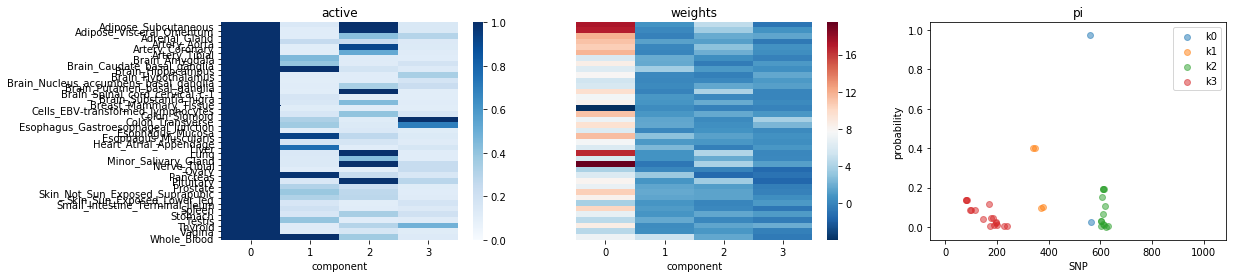

gene-ENSG00000185238.12_sigma2-20.00_phi-0.37_K-20_run-1_model
ENSG00000185238.12


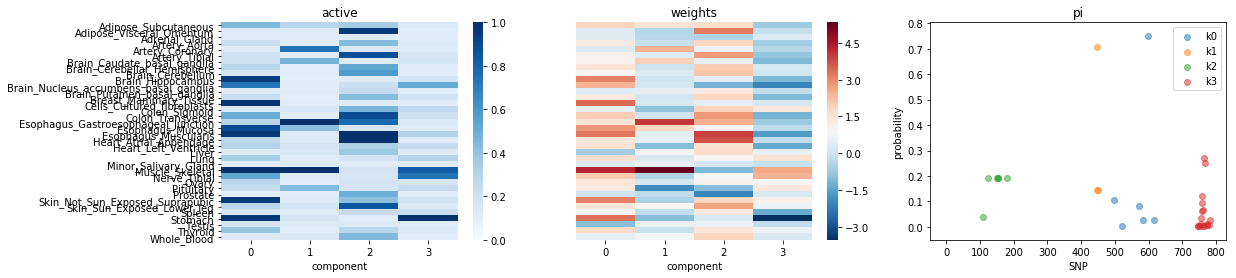

gene-ENSG00000239887.4_sigma2-20.00_phi-0.37_K-20_run-1_model


KeyError: 'gene-ENSG00000239887.4_sigma2-20.00_phi-0.37_K-20_run-1_model'

In [10]:
gene_models = {}
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    print(key)

    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    
    print(gene)
    model.plot_components()

In [17]:
gene = 'ENSG00000141644.17'
key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
model.__dict__ = models[key]

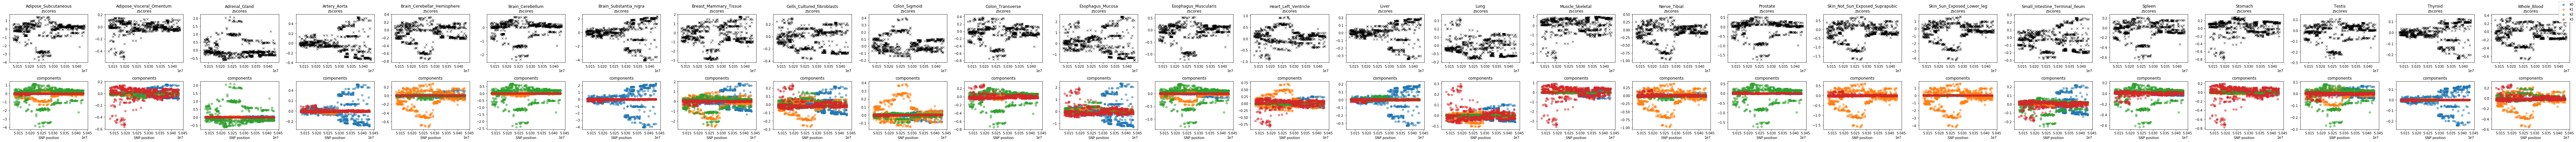

In [18]:
model.plot_decomposed_zscores()

In [16]:
np.all(model.weights > 0 & ~np.isclose(model.weights, 0), 0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [5]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    print(key)

    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    
    path = './figs/{}/{}'.format('_'.join(key.split('_')[1:3]), gene)
    if not os.path.isdir(path):
        print('making path: {}'.format(path))
        os.makedirs(path)
    
    model.plot_assignment_kl(save_path='{}/{}_assignment_kl.png'.format(path, key))
    model.plot_credible_sets_ld(save_path='{}/{}_credible_set_ld.png'.format(path, key))
    model.plot_colocalizations(save_path='{}/{}_colocalization.png'.format(path, key))

    model.plot_components(save_path='{}/{}_component_summary.png'.format(path, key))
    model.plot_component_x_component(save_path='{}/{}_component_x_component.png'.format(path, key))
    
    model.plot_decomposed_zscores(save_path='{}/{}_zscores.png'.format(path, key))
    model.plot_decomposed_manhattan(save_path='{}/{}_manhattan.png'.format(path, key))

    model.plot_residual_manhattan(save_path='{}/{}_residual_manhattan.png'.format(path, key))
    model.plot_residual_zscores(save_path='{}/{}_residual_zscores.png'.format(path, key))


gene-ENSG00000073464.11_sigma2-20.00_phi-0.37_K-20_run-1_model
gene-ENSG00000100258.17_sigma2-20.00_phi-0.37_K-20_run-1_model
gene-ENSG00000135362.13_sigma2-20.00_phi-0.37_K-20_run-1_model
gene-ENSG00000141644.17_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000141644.17
gene-ENSG00000141934.9_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000141934.9
gene-ENSG00000160181.8_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000160181.8
gene-ENSG00000164904.17_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000164904.17
gene-ENSG00000178172.6_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000178172.6
gene-ENSG00000184293.7_sigma2-20.00_phi-0.37_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.37/ENSG00000184293.7
gene-ENSG00000185238.12_sigma2-20.00_phi-0.37_K-20_run-1_model
making path:

In [8]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[2], Ks[0], 1])
    print(key)

    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    
    path = './figs/{}/{}'.format('_'.join(key.split('_')[1:3]), gene)
    if not os.path.isdir(path):
        print('making path: {}'.format(path))
        os.makedirs(path)
    
    model.plot_assignment_kl(save_path='{}/{}_assignment_kl.png'.format(path, key))
    model.plot_credible_sets_ld(save_path='{}/{}_credible_set_ld.png'.format(path, key))
    model.plot_colocalizations(save_path='{}/{}_colocalization.png'.format(path, key))

    model.plot_components(save_path='{}/{}_component_summary.png'.format(path, key))
    model.plot_component_x_component(save_path='{}/{}_component_x_component.png'.format(path, key))
    
    model.plot_decomposed_zscores(save_path='{}/{}_zscores.png'.format(path, key))
    model.plot_decomposed_manhattan(save_path='{}/{}_manhattan.png'.format(path, key))

    model.plot_residual_manhattan(save_path='{}/{}_residual_manhattan.png'.format(path, key))
    model.plot_residual_zscores(save_path='{}/{}_residual_zscores.png'.format(path, key))



gene-ENSG00000073464.11_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000073464.11
gene-ENSG00000100258.17_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000100258.17
gene-ENSG00000135362.13_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000135362.13
gene-ENSG00000141644.17_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000141644.17
gene-ENSG00000141934.9_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000141934.9
gene-ENSG00000160181.8_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000160181.8
gene-ENSG00000164904.17_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000164904.17
gene-ENSG00000178172.6_sigma2-20.00_phi-0.14_K-20_run-1_model
making path: ./figs/sigma2-20.00_phi-0.14/ENSG00000178172.6
gene-ENSG00000

In [13]:
from scipy.stats import norm

In [28]:
-norm.logcdf(0) #- np.log(2)

0.6931471805599453

In [ ]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    model.plot_decomposed_zscores(save_path='figs/zscores/{}_zscores.png'.format(key))

In [ ]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    model.plot_decomposed_manhattan(save_path='figs/manhattan/{}_manhattan.png'.format(key))

In [ ]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    model.plot_decomposed_manhattan2(save_path='figs/{}_manhattan.png'.format(key))

In [ ]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    model.plot_colocalizations(save_path='figs/colocalization/{}_colocalization.png'.format(key))

In [ ]:
for gene in genes:
    key = get_key([gene, sigma2s[2], phis[3], Ks[0], 1])
    model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
    model.__dict__ = models[key]
    model.plot_components(save_path='component_overview/{}_component_overview.png'.format(key))

In [ ]:
model.plot_colocalizations()

In [ ]:
int(np.sqrt(model.tissue_ids.size))

In [ ]:
int(np.sqrt(model.tissue_ids.size))

In [ ]:
model = SpikeSlabSER(np.zeros((1, 1)), np.zeros((1, 1)), 1, [], [], 0.1, 10.0)
model.__dict__ = models[key]

In [ ]:
model.plot_components()

In [ ]:
model.plot_component_correlations(save_path='./test.png')

In [ ]:
model.plot_credible_sets_ld(alpha=0.9, thresh=0.5)

In [ ]:
model.plot_decomposed_zscores2()

In [ ]:
active_tissue_x_components = (model.active > 0.5)
active_components = np.any(active_tissue_x_components, 0)

In [ ]:
for c in np.arange(model.K)[active_components]:
    model.plot_decomposed_zscores(tissues=model.tissue_ids[active_tissue_x_components[:, c]])

In [ ]:
for c in np.arange(model.K)[active_components]:
    model.plot_decomposed_manhattan(tissues=model.tissue_ids[active_tissue_x_components[:, c]])

In [ ]:
np.arange(model.T)[active_tissue_x_components[:, c]]

In [ ]:
model.plot_decomposed_zscores()

In [ ]:
model.plot_decomposed_zscores()

In [ ]:
model.plot_decomposed_manhattan()

In [ ]:
model.get_credible_sets(alpha=0.9, thresh=0.5)

In [ ]:
model.plot_assignment_kl()

In [ ]:
model.get_cre

In [ ]:
model.plot_credible_sets_ld(alpha=0.5, thresh=0.5)

In [ ]:
model.tissue_ids

In [ ]:
model.snp_ids

In [ ]:
zscore_path = './data/zscore_genes_for_Karl/'
gene = param.gene
zscores = pd.read_csv(zscore_path + param.gene + '.zscore_matrix.txt', '\t', index_col=0)
Y = zscores.loc[snps].values.T

ld_path = './marios_correlation_matrices/'
X = pd.read_csv(ld_path + param.gene, index_col=0)
X = X.loc[snps, snps]
X = (X + np.eye(X.shape[0])*1e-5)/(1 + 1e-5)

In [ ]:
key = 'geneENSG00000185238.12_K20_lambda1_nonnegTrue_3_model'

In [ ]:
overview.columns

In [ ]:
for gene in np.unique(overview.gene):
    fig, ax = plt.subplots(10, 4, figsize=(4*5, 4*8))
    for s, penalty in enumerate(['0.1', '1', '10', '20']):
        for t, k in enumerate([10, 20]):
            for run in range(5):
                key = get_key([gene, k, penalty, True, run])
                param = models[key]

                N = param.N
                K = param.K
                T = param.T
                pi = param.pi
                weights = param.weights
                beta_means = param.beta_means
                beta_vars = param.beta_vars
                tissues = param.tissues
                snps = param.snp_ids

                active = weights.max(0) > 1e-3
                if active.sum() == 0:
                    active[weights.max(0).argmax()] = True

                lead_snp = pi.argmax(0)
                lead_snp = lead_snp[active]
                sorter = np.argsort(lead_snp)
                ordered_active_components = np.arange(K)[active][sorter]

                """
                # make plot
                for i, c in enumerate(ordered_active_components):
                    ax[5*t + run, s].scatter(
                        np.arange(N), pi[:, c], alpha=0.5, label='{}, {}'.format(c, snps[lead_snp[sorter][i]]))
                """
                if s == 0:
                    sns.heatmap(weights[:, ordered_active_components], ax=ax[5*t + run, s],
                        annot=False, cmap='Blues',
                        xticklabels=ordered_active_components, yticklabels=tissues)
                else:
                    sns.heatmap(weights[:, ordered_active_components], ax=ax[5*t + run, s],
                        annot=False, cmap='Blues',
                        xticklabels=ordered_active_components)
    
                ax[5*t + run, s].set_title('K{}, penalty{}, {}'.format(K, penalty, run))
    plt.suptitle(gene)
    plt.savefig('./mixed_ser/figs/{}_weights.png'.format(gene))
    plt.show()
    plt.close()

In [ ]:
for gene in np.unique(overview.gene):
    fig, ax = plt.subplots(4, 10, figsize=(4*8, 4*5))
    for s, penalty in enumerate(['0.1', '1', '10', '20']):
        for t, k in enumerate([10, 20]):
            for run in range(5):
                key = get_key([gene, k, penalty, True, run])
                param = models[key]

                N = param.N
                K = param.K
                T = param.T
                pi = param.pi
                weights = param.weights
                beta_means = param.beta_means
                beta_vars = param.beta_vars
                tissues = param.tissues
                snps = param.snp_ids

                active = weights.max(0) > 1e-3
                if active.sum() == 0:
                    active[weights.max(0).argmax()] = True

                lead_snp = pi.argmax(0)
                lead_snp = lead_snp[active]
                sorter = np.argsort(lead_snp)
                ordered_active_components = np.arange(K)[active][sorter]

                """
                # make plot
                for i, c in enumerate(ordered_active_components):
                    ax[5*t + run, s].scatter(
                        np.arange(N), pi[:, c], alpha=0.5, label='{}, {}'.format(c, snps[lead_snp[sorter][i]]))
                """
                W = (beta_means * weights)[:, ordered_active_components]
                vmax = np.abs(W).max()
                vmin = -vmax
                if t == 0 and run == 0:
                    sns.heatmap(W, ax=ax[s, 5*t + run],
                        annot=False, cmap='RdBu_r',
                        xticklabels=ordered_active_components, yticklabels=tissues,
                        vmin=vmin, vmax=vmax)
                else:
                    sns.heatmap(W, ax=ax[s, 5*t + run],
                        annot=False, cmap='RdBu_r',
                        xticklabels=ordered_active_components,
                        vmin=vmin, vmax=vmax)
    
                ax[s, 5*t + run].set_title('K{}, penalty{}, {}'.format(K, penalty, run))
    #plt.suptitle(gene)
    plt.savefig('./mixed_ser/figs/{}_beta_weights.png'.format(gene))
    plt.show()
    plt.close()

In [ ]:
C = np.zeros((m.T, m.T))
penalty = '10'
K = 10

for gene in genes:
    fig, ax = plt.subplots(2, 4, figsize=(5*4, 4*2))
    
    for j, penalty in enumerate(['0.1', '1', '10', '20']):
        for i, k in enumerate([10, 20]):
            for run in range(5):
                key = get_key([gene, K, penalty, True, run])
                m = models[key]

                if run == 0:
                    C = np.zeros((m.T, m.T))

                weights = m.weights
                W = (m.beta_means * m.weights)
                C += (W @ W.T)
            
            sns.heatmap(np.sqrt(C + np.abs(C.min())), ax=ax[i, j], square=True, cmap='Blues')
            ax[i, j].set_title('{}\nK{}, penalty{}'.format(gene, K, penalty))
    plt.show()

In [ ]:
print(genes)

In [ ]:
sns.heatmap((weights > 1e-3).astype(int))

In [ ]:
def coincidence(weights, thresh):

In [ ]:
key = get_key([genes[0], 10, '0.1', True, 2])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 4], label=key, alpha=0.1)

key = get_key([genes[0], 10, '1', True, 4])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 4], label=key, alpha=0.1)

key = get_key([genes[0], 10, '10', True, 3])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 2], label=key, alpha=0.1)


plt.legend()

In [ ]:
key = get_key([genes[4], 10, '1', True, 2])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 4], label=key, alpha=0.1)
snps1 = np.arange(m.N)[m.pi[:, 4] > 0.05]

key = get_key([genes[4], 10, '1', True, 3])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 5], label=key, alpha=0.1)
snps2 = np.arange(m.N)[m.pi[:, 5] > 0.05]

plt.legend()

In [ ]:
ld_path = './marios_correlation_matrices/'
X = pd.read_csv(ld_path + genes[4], index_col=0)
X = X.loc[m.snp_ids, m.snp_ids]
X = (X + np.eye(X.shape[0])*1e-5)/(1 + 1e-5)

In [ ]:
snps1, snps2

In [ ]:
sns.heatmap(X.values[np.concatenate([snps1, snps2])][:, np.concatenate([snps1, snps2])], cmap='RdBu_r')

In [ ]:
sns.heatmap(X[snps1][:, snps2])

In [ ]:
key = get_key([genes[0], 10, 0.1, True, 2])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 7], label=key)

key = get_key([genes[0], 10, '1', True, 2])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 3], label=key)

key = get_key([genes[0], 10, '10', True, 2])
m = models[key]
plt.scatter(np.arange(m.N), m.pi[:, 0], label=key)

plt.legend()

In [ ]:
for gene in np.unique(overview.gene):
    fig, ax = plt.subplots(10, 4, figsize=(4*4, 4*10))
    for s, penalty in enumerate(['0.1', '1', '10', '20']):
        for t, k in enumerate([10, 20]):
            for run in range(5):
                key = get_key([gene, k, penalty, True, run])
                param = models[key]

                N = param.N
                K = param.K
                T = param.T
                pi = param.pi
                weights = param.weights
                beta_means = param.beta_means
                beta_vars = param.beta_vars
                tissues = param.tissues
                snps = param.snp_ids

                active = weights.max(0) > 1e-3
                if active.sum() == 0:
                    active[weights.max(0).argmax()] = True

                lead_snp = pi.argmax(0)
                lead_snp = lead_snp[active]
                sorter = np.argsort(lead_snp)
                ordered_active_components = np.arange(K)[active][sorter]

                
                # make plot
                for i, c in enumerate(ordered_active_components):
                    ax[5*t + run, s].scatter(
                        np.arange(N), pi[:, c], alpha=0.5, label='{}, {}'.format(c, snps[lead_snp[sorter][i]]))
                """
                if s == 0:
                    sns.heatmap(weights[:, ordered_active_components], ax=ax[5*t + run, s],
                        annot=False, cmap='Blues',
                        xticklabels=ordered_active_components, yticklabels=tissues)
                else:
                    sns.heatmap(weights[:, ordered_active_components], ax=ax[5*t + run, s],
                        annot=False, cmap='Blues',
                        xticklabels=ordered_active_components)
                """
                ax[5*t + run, s].set_title('K{}, penalty{}, {}'.format(K, penalty, run))
    plt.suptitle(gene)
    plt.savefig('./mixed_ser/figs/{}_pi.png'.format(gene))
    plt.show()
    plt.close()

In [ ]:
for key in models.keys():
    
    param = models[key]

    N = param.N
    K = param.K
    T = param.T
    pi = param.pi
    weights = param.weights
    beta_means = param.beta_means
    beta_vars = param.beta_vars
    tissues = param.tissues
    snps = param.snp_ids

    active = weights.max(0) > 1e-3
    if active.sum() == 0:
        active[weights.max(0).argmax()] = True

    lead_snp = pi.argmax(0)
    lead_snp = lead_snp[active]
    sorter = np.argsort(lead_snp)
    ordered_active_components = np.arange(K)[active][sorter]

    # make plot
    """
    fig, ax = plt.subplots(1, active.sum(), figsize=(active.sum()*4, 3), sharex=True, sharey=True)
    if active.sum() == 1:
        ax = [ax]
    for i, k in enumerate(ordered_active_components):
        ax[i].scatter(np.arange(N), pi[:, k], alpha=0.5, label=k)
        ax[i].set_title('Component {}\n {}'.format(k, snps[lead_snp[sorter][i]]))

    plt.show()
    """

    # make plot
    for i, k in enumerate(ordered_active_components):
        plt.scatter(np.arange(N), pi[:, k], alpha=0.5, label='{}, {}'.format(k, snps[lead_snp[sorter][i]]))

    plt.xlabel('SNP')
    plt.ylabel('probability')
    plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
    plt.savefig('{}_pi.png'.format(key))
    plt.close()

    fig, ax = plt.subplots(1, figsize=(10, 6))
    sns.heatmap(weights[:, ordered_active_components],
                annot=False, cmap='Blues',
                xticklabels=ordered_active_components, yticklabels=tissues)
    plt.title(key)
    plt.savefig('{}_weights.png'.format(key))
    plt.close()

In [ ]:
gene = genes[0]

In [ ]:
key = get_key([genes[0], 10, '0.1', True, 2])
m = models[key]

In [ ]:
zscore_path = './data/zscore_genes_for_Karl/'
zscores = pd.read_csv(zscore_path + m.gene + '.zscore_matrix.txt', '\t', index_col=0)
Y = zscores.loc[m.snp_ids].values.T

ld_path = './marios_correlation_matrices/'
X = pd.read_csv(ld_path + m.gene, index_col=0)
X = X.loc[m.snp_ids, m.snp_ids]
X = (X + np.eye(X.shape[0])*1e-5)/(1 + 1e-5)

In [ ]:
key = get_key([genes[0], 10, '0.1', True, 2])
m = models[key]

pred = (m.weights * m.beta_means) @ (X @ m.pi).T
fig, ax = plt.subplots(2, m.T, figsize=(4 * m.T, 7), sharey=True, sharex=False)
for t in range(m.T):
    ax[0, t].scatter(np.arange(m.N), Y[t], marker='x', alpha=0.5, c='k')
    ax[0, t].scatter(np.arange(m.N), pred[t], marker='o', alpha=0.5, c='r')
    ax[0, t].set_title('{}'.format(m.tissues[t]))
    
    ax[1, t].scatter(pred[t], Y[t], marker='x', alpha=0.5, c='k')

In [ ]:
key = get_key([genes[0], 10, '1', True, 1])
m = models[key]

fig, ax = plt.subplots(1, figsize=(20, 20))
sns.heatmap(m.weights*m.beta_means, cmap='Blues', yticklabels=m.tissues)

In [ ]:
plt.scatter(np.arange(m.N), m.pi[:, 3])

In [ ]:
plt.scatter(np.arange(m.N), m.pi[:, 6])
plt.scatter(np.arange(m.N), m.pi[:, 8])
plt.scatter(np.arange(m.N), m.pi[:, 3])

In [ ]:
key = get_key([genes[0], 10, '10', True, 2])
m = models[key]

sns.heatmap(m.weights * m.beta_means, cmap='Blues')
plt.show()

pred = (m.weights * m.beta_means) @ (X @ m.pi).T
fig, ax = plt.subplots(2, m.T, figsize=(4 * m.T, 7), sharey=True, sharex=False)
for t in range(m.T):
    ax[0, t].scatter(np.arange(m.N), Y[t], marker='x', alpha=0.5, c='k')
    ax[0, t].scatter(np.arange(m.N), pred[t], marker='o', alpha=0.5, c='r')
    ax[0, t].set_title('{}'.format(m.tissues[t]))
    
    ax[1, t].scatter(pred[t], Y[t], marker='x', alpha=0.5, c='k')

In [ ]:
key = get_key([genes[0], 10, '20', True, 2])
m = models[key]

sns.heatmap(m.weights * m.beta_means, cmap='Blues')
plt.show()

pred = (m.weights * m.beta_means) @ (X @ m.pi).T
fig, ax = plt.subplots(2, m.T, figsize=(4 * m.T, 7), sharey=True, sharex=False)
for t in range(m.T):
    ax[0, t].scatter(np.arange(m.N), Y[t], marker='x', alpha=0.5, c='k')
    ax[0, t].scatter(np.arange(m.N), pred[t], marker='o', alpha=0.5, c='r')
    ax[0, t].set_title('{}'.format(m.tissues[t]))
    
    ax[1, t].scatter(pred[t], Y[t], marker='x', alpha=0.5, c='k')